In [ ]:
from sklearn.datasets import make_regression
import numpy as np

In [ ]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

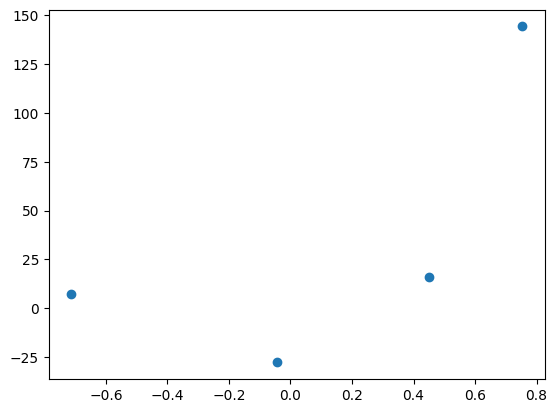

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

# this is the diagram of our small dataset

In [ ]:
# Let's apply OLS(ordinary least squares)

from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [ ]:
# we find here the value of slope and intercept,

print("Slope:", reg.coef_)
print("Intercept:", reg.intercept_)

Slope: [78.35063668]
Intercept: 26.15963284313262


In [ ]:
# so, we start the code with the random value of 'b' and reach finaly at the value closely to 26.159.
# that's our end goal.

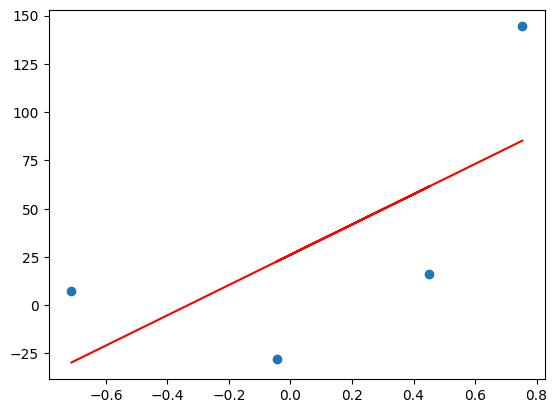

In [ ]:
# if we know the value of 'm' and 'b', then we can plot our "best fit line";

plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='red')

In [ ]:
# Let's apply Gradient Descent assuming slope is constant i.e., (m=78.35)
# and let's assume the starting value for intercept b=0. And, finally isko 26.15 ke approx phuchna hai hmlg ko.
# So, finally jo hmara line bnega Gradient descent se, wo is line ke upr ya aas-pass rhega

# we can also take any random value in place of 'b'(whatever you think).


# for b=0 :-
y_pred = ((78.35 * X) + 0).reshape(4)

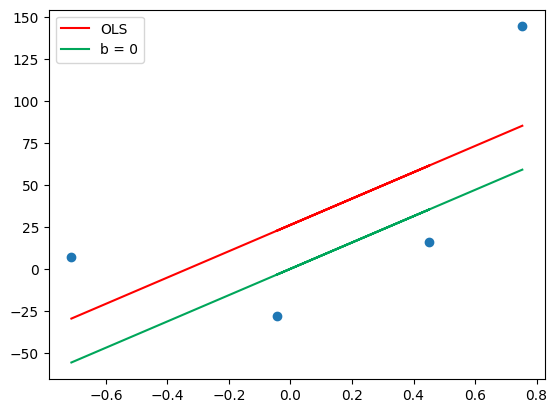

In [ ]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

# so, yeh green wali line jb hmne gradient descent start kiya tha uski hai...
# and, we have to reach upto pr nearby red line.

In [ ]:
# Iteration 1 :-

m = 78.35
b = 0

# now, by using the equation of the slope, we calculate the slope at b=0:-
# eqn is:-  (-2)*sigma(i=1,n)(Yi - m*Xi - b)


loss_slope = (-2) * np.sum(y - m*X.ravel() - b)
loss_slope

np.float64(-209.27763408209216)

In [ ]:
# Let's take our learning rate=0.1 (you can also take it as 0.01, 0.001, etc.....)

lr = 0.1     # learning_rate

# step_size = lr * slope

step_size = loss_slope * lr
step_size

np.float64(-20.927763408209216)

In [ ]:
# Now, we have to find b_new, using the formula--
# formula:-   b_new = b_old - step_size


b = b - step_size
b

# so now, It's 20.92 ...... so, we can see that we start it from b=0 and we have to go on 26.15(so, it's increasing..)

np.float64(20.927763408209216)

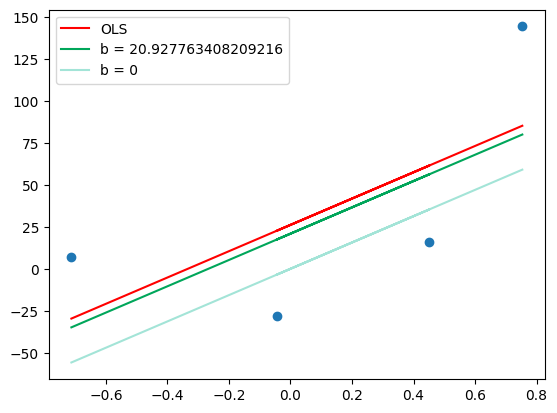

In [ ]:
# here, slope is constant, and we have 'b_new'
# that's why, I again calculate our 'y_pred', so that i plot my graph

y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

# here, we can see that we are appraching near to the red line
# so, do the same thing 2-3 times more and check whether slope comes near to 26.15

In [ ]:
# Iteration 2:-

# Now, we are again calculating the slope at the b_new2

loss_slope = (-2) * np.sum(y - m * X.ravel() -b)
loss_slope

np.float64(-41.85552681641843)

In [ ]:
step_size = lr * loss_slope
step_size

np.float64(-4.185552681641844)

In [ ]:
b = b - step_size
b

# Now, it becomes 25.11(even more close 26.15) and more than previous value i.e., 20.92.

np.float64(25.11331608985106)

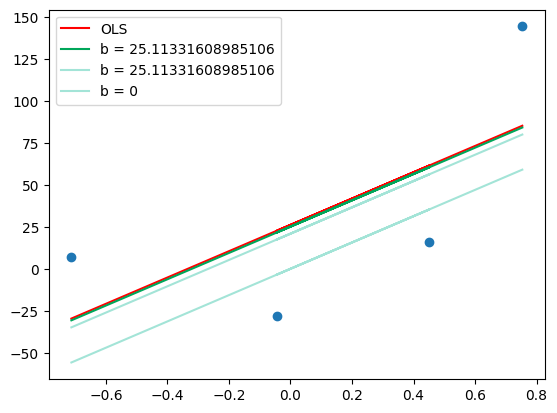

In [ ]:
# Again, calculate 'y_pred2' for this-

y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

# so, we can see clearly that it something seems to be overlapping with 'OLS_line'
# that means, we are almost there

In [ ]:
# Let's take one more iteration

# Iteration 3:-

loss_slope = (-2) * np.sum(y - m * X.ravel() - b)
loss_slope

np.float64(-8.371105363283675)

In [ ]:
step_size  = lr * loss_slope
step_size

np.float64(-0.8371105363283675)

In [ ]:
b = b - step_size
b

# Now, it becomes 25.95(even more close 26.15) and more than previous value i.e., 25.11.

np.float64(25.95042662617943)

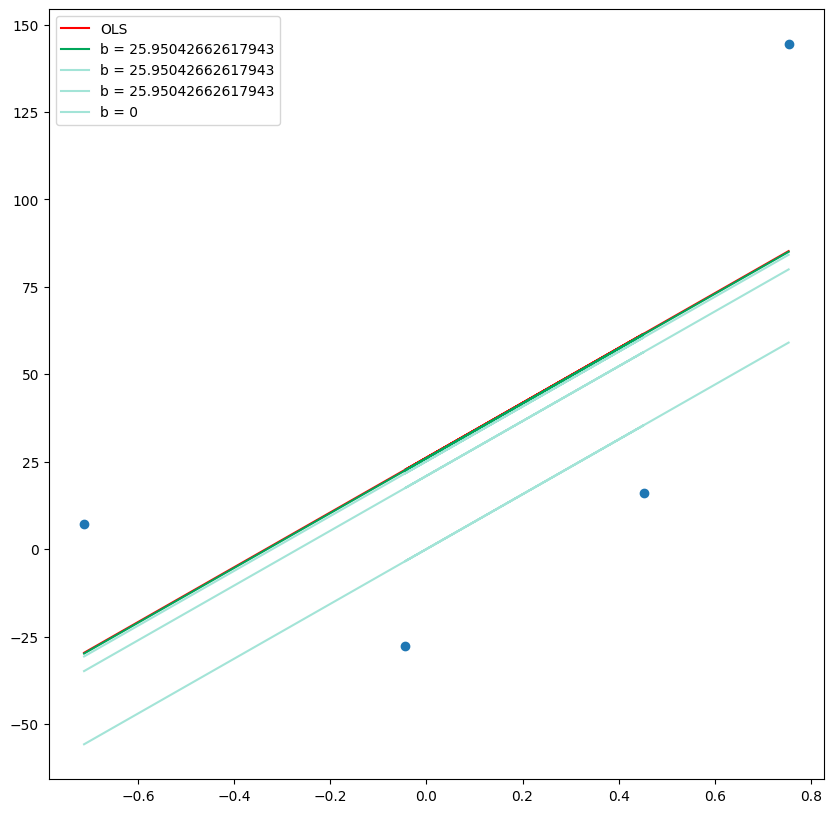

In [ ]:
# calculate for 'y_pred3' :-

y_pred3 = ((78.35 * X) + b).reshape(4)


plt.figure(figsize=(10,10))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

# so, we can see clearly that it something seems to be overlapping with 'OLS_line'
# that means, we are almost there

In [ ]:
# you can check and test it for any value of 'b'
# i.e., you can check it by putting b=100,200,1000... in the starting
# and, even after putting any random value, it totally overlapped the 'OLS_line' at the end.

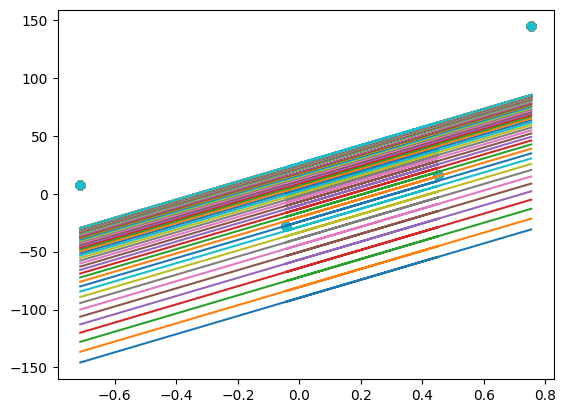

In [ ]:
# Now, let's do this whole process in the loop using code

b = -100     # let's we take starting point 'b'= -100
m = 78.35
lr = 0.01     # if we put value of 'lr' too less, then,it takes slow steps to reach at 'OLS_line'

epochs = 100         # means kitni baar mai loop me chalaunga

for i in range(epochs):

  loss_slope = (-2) * np.sum(y - m * X.ravel() - b)
  step_size = lr * loss_slope
  b = b - step_size

  y_pred = m * X  + b

  plt.plot(X, y_pred)
  plt.scatter(X,y)

In [ ]:
# if you take the value of (lr=0.01 and epochs=10), then you can't reach the 'OLS_line'(b.c of small steps)
# but,if you take the value of (lr=0.01 and epochs=100), then you can reach the 'OLS_line' at the end.
# beacuse (epochs=100) this means you take more steps, so at the end, you will reach 'OLS_line' finally.

In [ ]:
# that means agr 'lr_steps' km hoga to bhut time lega (but hm phuch jayenge)
# but, if 'lr_steps' bda hoga to gadbad ho skti hai